<img src= 'lights_at_night.jpg'>

<h1><center> WeatherPy - Homework 6 - API</center></h1>

#### 3 Observations

* Latitude affects temperature: It is common sense that as you get closer to the equator the temperature will rise.  This is clearly shown in the Latitude vs. Temperature graph with the curvlinear relationship demonstrating the change in temperature for cities with high and low latitudes.

* It appears that Latitude and Cloudiness are independent of each other.  There is no discernable relationship between Latitude and Cloudiness shown in Plot 3, with cities of varying Latitude showing varying values of Cloudiness.

* 72% of the randomly selected cities are in the northern hemisphere. 


#### Environment Setup

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from requests import get
from time import sleep
from pprint import pprint
from config import api_key
from datetime import datetime

#### Generate 500+ Random City Names

In [ ]:
#
# This code cell was provided as starter code
#

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 25000) # Adjust the size for more cities
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 25000) # Must match above N size

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

#### Initalize needed objects for API calls

In [ ]:
# Setup the cities iterator
city_list = [str(i) for i in cities]

# Initialize needed objects
city_count = 0
city_data = pd.DataFrame()

#### API Call
###### Note: This takes a few minutes ...

In [ ]:
# For loop through the cities iterator, pulling needed data from the JSON request object
for city in city_list:
    
    # Get JSON response file for each city
    response = get('http://api.openweathermap.org/data/2.5/weather?q='
                   + city
                   + '&APPID='
                   + api_key 
                   + '&units=metric').json()
    
    # Pause for 1.175 seconds (70.5 seconds for 60 requests) 
    # to ensure compliance with request rate of 60 calls per minute
    sleep(1.175)
    
    try:
        
        # Test response code of JSON file for cities not found
        if response['cod'] == 200:
            
            # Pull needed data from JSON response object and insert into a dictionary
            city_dict = {
                'city_id': response['id'],
                'name': response['name'],
                'country': response['sys']['country'],
                'longitude': response['coord']['lon'],
                'latitude': response['coord']['lat'],
                'cloudiness': response['clouds']['all'],
                'humidity': response['main']['humidity'],
                'temperature': response['main']['temp'],
                'wind_speed': response['wind']['speed'],
                'time': response['dt']
            }
        
            # Create a temporary single row dataframe with the current cities data
            temp_df = pd.DataFrame(city_dict, index = ['city']).set_index('city_id')  
        
            # Add the temporary dataframe row to the pre-intialized city_data DataFrame
            city_data = pd.concat([city_data, temp_df])
        
            # Add 1 for each city iteration to the city counter
            city_count += 1
        
            # Collect the current cities name
            city_name = city_dict['name']    
            
            # Re-intialise the city dictionary to be empty for the next interation
            city_dict = {}
            
        else:
            
            print('City not found ... skipping.')
    
    # Raise a KeyError if a cities JSON response does not include all of the needed data
    except KeyError as e:
        
        print(f'Skipping city ... : KeyError: {e} not found.') 
    
    print(f'Accessing city # {city_count} | {city_name}')


#### Clean DataFrame

In [ ]:
city_data = city_data.reset_index()

city = city_data.rename(columns={
    'name': 'City',
    'country': 'Country',
    'longitude': 'Lon',
    'latitude': 'Lat',
    'temperature': 'Temp',
    'wind_speed': 'Wind Speed',
    'humidity': 'Humidity',
    'cloudiness': 'Cloudiness (%)',
    'time': 'Time'
})


city['Time'] = pd.to_datetime(city['Time'], unit = 's')

request_time = city['Time'][0]
n_cities = len(city)

#### Preview DataFrame

In [ ]:
city.head()

In [ ]:
city.info()

#### Save CSV

In [88]:
#city.to_csv('city_data.csv')
city = pd.read_csv('city_data.csv')

In [95]:
request_time = city['Time'][0]
n_cities = len(city)
request_time, n_cities

('2019-08-14 00:05:16', 3575)

In [4]:
city.head()

Unnamed: 0  city_id          City Country     Lon    Lat  Cloudiness (%)  \
0           0  3389822   Salinopolis      BR  -47.36  -0.61              78   
1           1  3437029  San Patricio      PY  -56.83 -26.98               0   
2           2  3833367       Ushuaia      AR  -68.31 -54.81              75   
3           3  3026644      Souillac      FR   -0.60  45.60               0   
4           4  1651810         Airai      TL  125.41  -8.93               2   

   Humidity   Temp  Wind Speed                 Time  
0        80  27.78        8.38  2019-08-14 00:05:16  
1        76   7.38        2.83  2019-08-14 00:05:17  
2        55   3.00        2.10  2019-08-14 00:03:15  
3        82  14.44        0.89  2019-08-14 00:05:20  
4        40  25.38        0.36  2019-08-14 00:05:21

In [5]:
city = city[city['Humidity'] <= 100]

#### Global parameter for plot font size

In [6]:
# Set the global plot parameter for font size
plt.rcParams.update({'font.size': 20})

# Place all plot objects in front of plot grids
plt.rcParams['axes.axisbelow'] = True

<center><h2>Plot 1 - Temperature</h2></center>

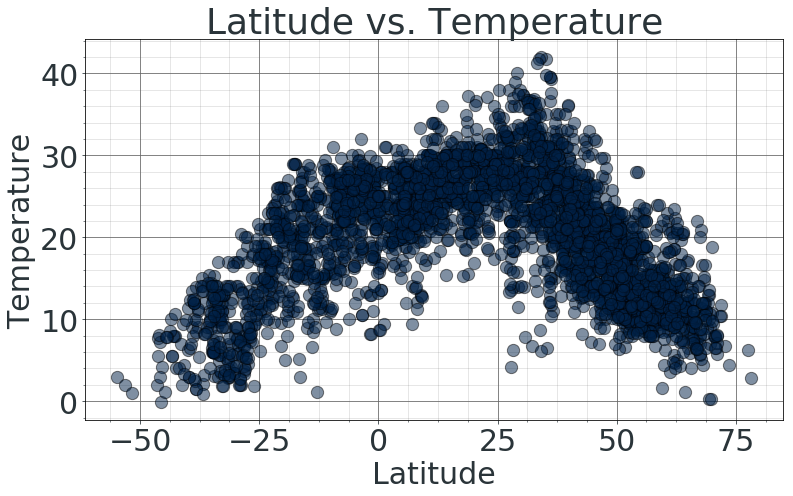

In [75]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Temp'],
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Temperature')
ax.set_xlabel('Latitude')
ax.set_title('Latitude vs. Temperature')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('Images/WeatherPy - Temperature.png', transparent=True)

plt.show()

<center><h2>Plot 2 - Humidity</h2></center>

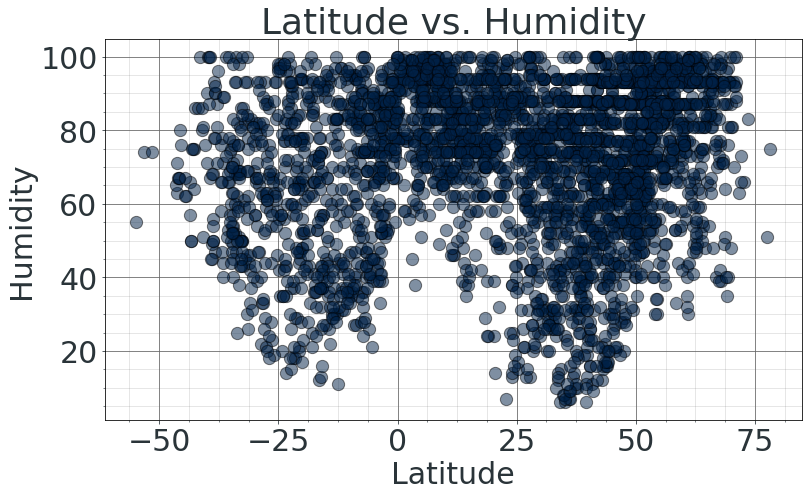

In [74]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Humidity'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.set_title('Latitude vs. Humidity')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('Images/WeatherPy - Humidity.png', transparent=True)

plt.show()

<center><h2>Plot 3 - Cloudiness</h2></center>

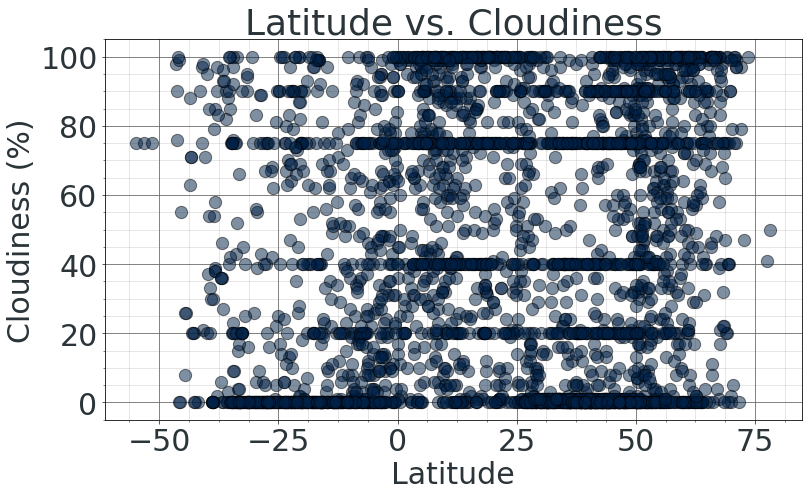

In [73]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Cloudiness (%)'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.set_title('Latitude vs. Cloudiness')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('Images/WeatherPy - Cloudiness.png', transparent=True)

plt.show()

<center><h2>Plot 4 - Wind Speed</h2></center>

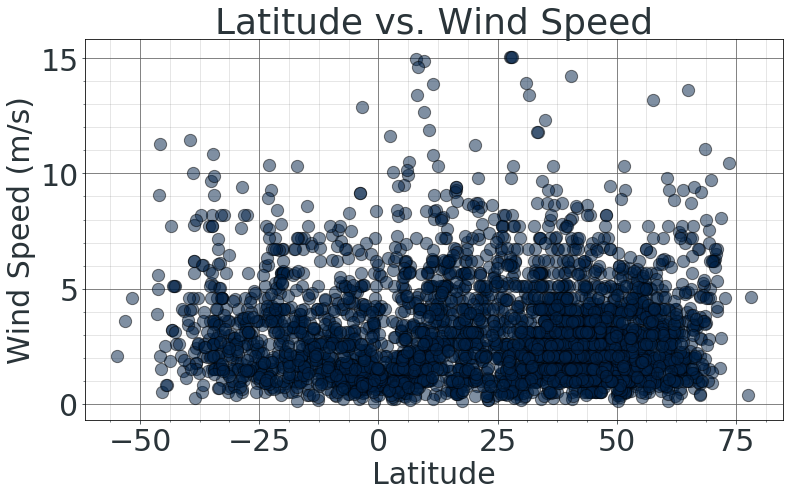

In [71]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lat'], 
    city['Wind Speed'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Latitude')
ax.set_title('Latitude vs. Wind Speed')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('Images/WeatherPy - Wind Speed.png', transparent=True)

plt.show()

<center><h2>Global City Temperatures</h2></center>

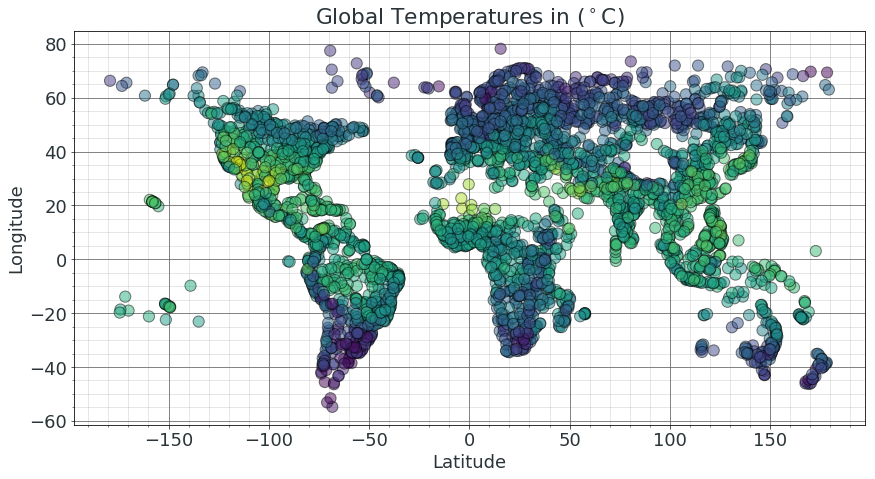

In [70]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    city['Lon'], 
    city['Lat'], 
    c = city['Temp'], 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 125
)

ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_title('Global Temperatures in ($^\circ$C)')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('Images/WeatherPy - Global Temperature.png', transparent=True)

plt.show()

<center><h2>Histogram of City Temperatures</h2></center>

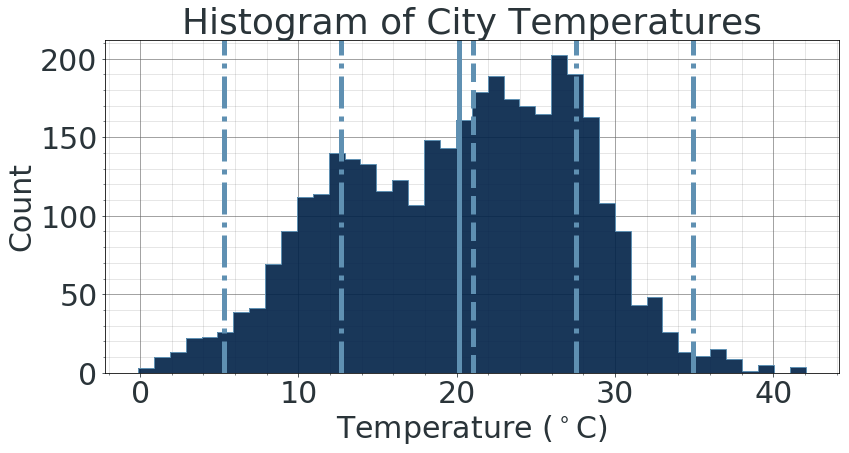

In [59]:
temp_bins = int(round(abs(city['Temp'].min()) + city['Temp'].max(), 0))

plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.hist(
    city['Temp'],
    bins = temp_bins,
    color = '#002147',
    alpha = .9
)
ax.hist(
    city['Temp'], 
    bins = temp_bins, 
    color = '#5F90B2', 
    histtype = 'step'
)

ax.set_xlabel('Temperature ($^\circ$C)')
ax.set_ylabel('Count')
ax.set_title('Histogram of City Temperatures')

temp_mean = city['Temp'].mean()
ax.axvline(
    x = temp_mean, 
    color = '#5F90B2', 
    lw = 5
)

temp_median = city['Temp'].median()
ax.axvline(
    x = temp_median, 
    color = '#5F90B2', 
    lw = 5, 
    ls = '--'
)

temp_std = round(city['Temp'].std(), 2)

ax.axvline(
    x = temp_std + temp_mean,
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

ax.axvline(
    x = temp_std + temp_std + temp_mean,
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

ax.axvline(
    x = temp_mean - temp_std, 
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

ax.axvline(
    x = temp_mean - temp_std - temp_std, 
    color = '#5F90B2', 
    lw = 5, 
    ls = '-.'
)

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#666666', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig('Images/Histogram of City Temperatures', transparent=True)

plt.show()

<center><h2>Scatterplot of Northern Hemisphere Cities vs. Temperature</h2></center>

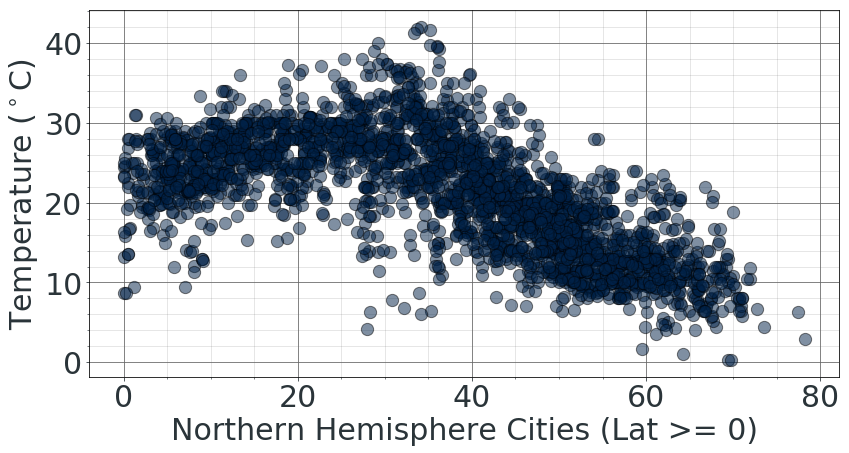

In [60]:
northern_hemi = city[city['Lat'] >= 0]

plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

ax.scatter(
    northern_hemi['Lat'], 
    northern_hemi['Temp'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_xlabel('Northern Hemisphere Cities (Lat >= 0)')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.tight_layout()
plt.savefig('Images/WeatherPy - Northern Cities Temperatures.png', transparent=True)

plt.show()

<center><h2>Histogram of City Latitudes</h2></center>

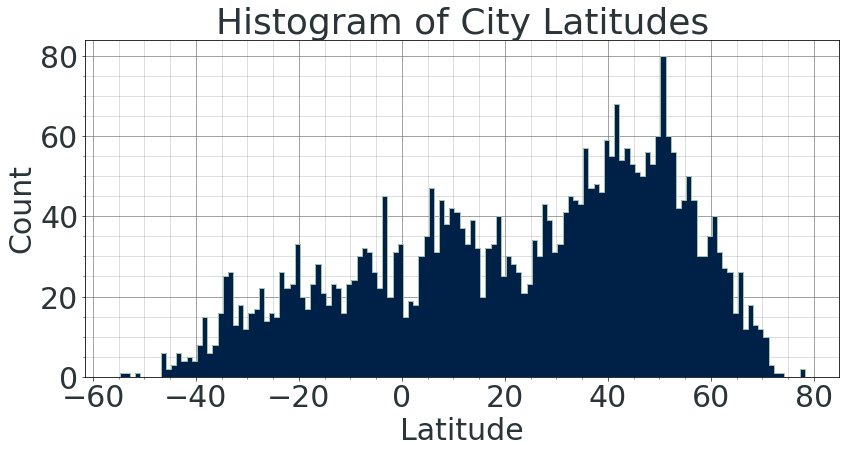

In [61]:
plt.rcParams.update({'font.size': 30})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ax = plt.subplots(1, figsize = [12.5, 7])

lat_bins = int(round(abs(city['Lat'].min()) + city['Lat'].max(), 0))

ax.hist(
    city['Lat'],
    bins = lat_bins,
    color = '#002147'
)
ax.hist(
    city['Lat'], 
    bins = lat_bins, 
    color = '#A3C1AD', 
    histtype = 'step'
)

ax.set_xlabel('Latitude')
ax.set_ylabel('Count')
ax.set_title('Histogram of City Latitudes')

plt.grid(
    b = True, 
    which = 'major', 
    color = '#666666', 
    linestyle = '-',
    alpha = 0.75
)

plt.minorticks_on()
plt.grid(
    b = True, 
    which = 'minor', 
    color = '#2a3439', 
    linestyle = '-', 
    alpha = 0.2
)

plt.tight_layout()
plt.savefig('Images/Histogram of City Latitudes.png', transparent=True)

plt.show()

In [14]:
city.head()

Unnamed: 0  city_id          City Country     Lon    Lat  Cloudiness (%)  \
0           0  3389822   Salinopolis      BR  -47.36  -0.61              78   
1           1  3437029  San Patricio      PY  -56.83 -26.98               0   
2           2  3833367       Ushuaia      AR  -68.31 -54.81              75   
3           3  3026644      Souillac      FR   -0.60  45.60               0   
4           4  1651810         Airai      TL  125.41  -8.93               2   

   Humidity   Temp  Wind Speed                 Time  
0        80  27.78        8.38  2019-08-14 00:05:16  
1        76   7.38        2.83  2019-08-14 00:05:17  
2        55   3.00        2.10  2019-08-14 00:03:15  
3        82  14.44        0.89  2019-08-14 00:05:20  
4        40  25.38        0.36  2019-08-14 00:05:21

#### Northen Hemisphere City Percentage

In [15]:
northern = city[city['Lat'] >= 0]
round(northern['city_id'].nunique()/city['city_id'].nunique(), 2)

0.75

### Quad Plot

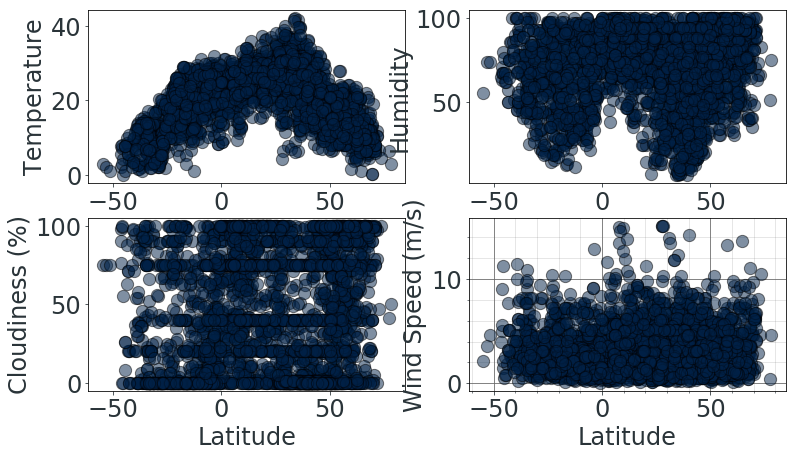

In [35]:
plt.rcParams.update({'font.size': 24})
plt.rcParams['axes.axisbelow'] = True

COLOR = '#2a3439'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['lines.color'] = COLOR
plt.rcParams['lines.linewidth'] = 2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = [12.5, 7])

ax1.scatter(
    city['Lat'], 
    city['Temp'],
    c = '#2a3439', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax1.set_ylabel('Temperature')
ax1.set_xlabel('Latitude')

ax2.scatter(
    city['Lat'], 
    city['Humidity'], 
    c = '#2a3439', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax2.set_ylabel('Humidity')
ax2.set_xlabel('Latitude')

ax3.scatter(
    city['Lat'], 
    city['Cloudiness (%)'], 
    c = '#2a3439', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax3.set_ylabel('Cloudiness (%)')
ax3.set_xlabel('Latitude')

ax4.scatter(
    city['Lat'], 
    city['Wind Speed'], 
    c = '#002147', 
    alpha = 0.5, 
    edgecolors = 'black', 
    linewidths = 1,
    s = 150
)

ax4.set_ylabel('Wind Speed (m/s)')
ax4.set_xlabel('Latitude')

plt.grid(b = True, which = 'major', color = '#666666', linestyle = '-')
plt.minorticks_on()
plt.grid(b = True, which = 'minor', color = '#666666', linestyle = '-', alpha = 0.2)

plt.savefig('Images/Latitude ~ Quads.png', transparent=True)

plt.show()

In [94]:
df = city.drop(columns=['Unnamed: 0'])
df.to_html(
    'weatherpy_data.html',
    classes=["table-hover, table-striped, table-hover"],
    bold_rows=True,
    header=True
)

In [93]:
df

city_id                City Country     Lon    Lat  Cloudiness (%)  \
0     3389822         Salinopolis      BR  -47.36  -0.61              78   
1     3437029        San Patricio      PY  -56.83 -26.98               0   
2     3833367             Ushuaia      AR  -68.31 -54.81              75   
3     3026644            Souillac      FR   -0.60  45.60               0   
4     1651810               Airai      TL  125.41  -8.93               2   
5     1006984         East London      ZA   27.91 -33.02               0   
6     1798537             Hanyang      CN  105.51  32.14              29   
7     3831208             Qaanaaq      GL  -69.36  77.48              41   
8     5106834              Albany      US  -73.75  42.65              75   
9     3514593           Tecolutla      MX  -98.74  17.31              72   
10    4030556             Rikitea      PF -134.97 -23.12               0   
11    6201424             Mataura      NZ  168.86 -46.19              76   
12    1637001                Biak      ID  122.88  -0.91              94   
13    2146219          Hervey Bay      AU  152.85 -25.30              90   
14    3685871             Corinto      CO  -76.26   3.17              40   
15     105299               Jizan      SA   42.56  16.89              40   
16    1852357             Shimoda      JP  138.93  34.70              75   
17    2508813               Adrar      DZ   -0.29  27.87               0   
18    3433715                Goya      AR  -59.27 -29.14               0   
19    1255860               Basna      IN   73.75  25.97              91   
20    4031637          Lavrentiya      RU -170.99  65.58              84   
21    1326105               Falam      MM   93.68  22.91             100   
22    2090021           Namatanai      PG  152.44  -3.66              62   
23    4035715              Avarua      CK -159.78 -21.21              35   
24    2163355              Hobart      AU  147.33 -42.88              20   
25    3443061                Chuy      UY  -53.46 -33.69              52   
26    1263751             Mangrol      IN   76.51  25.33             100   
27    2208248          Kaitangata      NZ  169.85 -46.28              90   
28    3832899              Viedma      AR  -62.99 -40.81              21   
29    1273574               Vaini      IN   74.49  15.34             100   
...       ...                 ...     ...     ...    ...             ...   
3545   160677         Chake Chake      TZ   39.77  -5.25               3   
3546  2272491              Zwedru      LR   -8.13   6.07              92   
3547  3660573           Archidona      EC  -77.81  -0.91             100   
3548  3980844              Tuxpan      MX -103.38  19.56              40   
3549  2663293            Vetlanda      SE   15.09  57.43               0   
3550   587450                Juba      EE   26.93  57.82              64   
3551   157977              Kibiti      TZ   38.94  -7.72               6   
3552  2624652               Holme      DK   10.17  56.11               1   
3553   238566                Ippy      CF   21.20   6.26             100   
3554   601294               Nukus      UZ   59.61  42.46               0   
3555    53157             Qandala      SO   49.87  11.47              20   
3556  1816336             Binzhou      CN  117.96  37.38               0   
3557  3102987         Boleslawiec      PL   15.57  51.26             100   
3558   147425            Neftcala      AZ   49.25  39.37               0   
3559  2295684              Salaga      GH   -0.52   8.55              30   
3560  1518768            Stepnyak      KZ   70.79  52.83               7   
3561  4017992  Atotonilco el Alto      MX -102.51  20.55               0   
3562  2012626           Zavitinsk      RU  129.44  50.11             100   
3563  3456277              Nobres      BR  -56.34 -14.72              67   
3564   682038          Chirnogeni      RO   28.23  43.90               0   
3565  2414079               Yomou      GN   -9.26   7.